# Airlines

> 대회 안내
- target : 0 or 1 -> 분류

> 평가 산식
- Accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
# id 행 제거
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

In [4]:
print("train's shape : {}".format(df_train.shape))
print("test's shape : {}".format(df_test.shape))

train's shape : (3000, 23)
test's shape : (2000, 22)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [6]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


# EDA

## Gender

In [10]:
df_train['Gender'].value_counts()

Male      1502
Female    1498
Name: Gender, dtype: int64

In [14]:
# Gender 별로 target 1의 수
df_train['target'].groupby(df_train['Gender']).sum()

Gender
Female    1007
Male       661
Name: target, dtype: int64

In [16]:
# Gender별 target 1의 비율
df_train['target'].groupby(df_train['Gender']).mean()

Gender
Female    0.67223
Male      0.44008
Name: target, dtype: float64

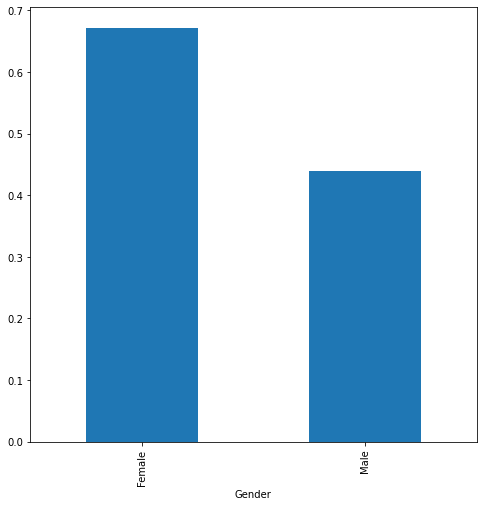

In [21]:
plt.figure(figsize=(8,8))
df_train['target'].groupby(df_train['Gender']).mean().plot.bar()
plt.show()